# mAiLab_0006: Pooling

In [1]:
import numpy as np
import os
print(os.listdir("../input"))

import requests
from tqdm import tqdm as tqdm
import math

import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) # adjust the size of figures

['MNIST_utils.py']
Populating the interactive namespace from numpy and matplotlib


HW0006:

將作業3 [1] 的前五個圖，分別跑 max pooling 與 average pooling [2]，共輸出10個圖，以圖示呈現 [3], [4]，並請反白處理 [4]。

1. 本次無進階題。
2. 作業要有檔頭。
3. 作業要有註解。原則上英文優於繁體中文優於簡體中文優於不寫註解。
4. 作業的連結請回覆至FB本貼文下方。

In [2]:
#Preparation: Recall HW0003-1: 下載MNIST四個檔案, 並顯示training set的第一張圖
%run '../input/MNIST_utils.py'

filename_list = ['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz',
                't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz']
#Download
for filename in filename_list:
    download_file('http://yann.lecun.com/exdb/mnist/' + filename, filename)

image, label = read_mnist(images=filename_list[0], labels=filename_list[1])
print('first label:{}'.format(label[0]))
print('first image:')
print_image(image[0])

100%|██████████| 4542/4542 [00:00<00:00, 2834056.65B/s]


first label:5
first image:
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 03 12 12 12 7E 88 AF 1A A6 FF F7 7F 00 00 00 00 
00 00 00 00 00 00 00 00 1E 24 5E 9A AA FD FD FD FD FD E1 AC FD F2 C3 40 00 00 00 00 
00 00 00 00 00 00 00 31 EE FD FD FD FD FD FD FD FD FB 5D 52 52 38 27 00 00 00 00 00 
00 00 00 00 00 00 00 12 DB FD FD FD FD FD C6 B6 F7 F1 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 50 9C 6B FD FD CD 0B 00 2B 9A 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 0E 01 9A FD 5A 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 8B FD

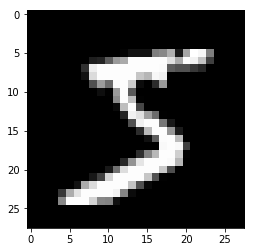

In [3]:
plt.imshow(image[0], cmap=plt.cm.gray)

#### HW06 from here...

In [10]:
#Pooling layer parameters
n_prev = image[0].shape
kernel_size = (2,2)
stride = kernel_size[0]
padding = 0
n = int((n_prev[0] + 2*padding - kernel_size[0])/stride) + 1
print("feature size after pooling: ",n)

feature size after pooling:  14


In [66]:
def pooling(img, kernel_size, stride, padding, mode):
    n_prev = img.shape
    n = int((n_prev[0] + 2*padding - kernel_size[0])/stride) + 1
    pooling_img = np.zeros((n,n))
    steps = n
    for i in range(steps):
        for j in range(steps):
            row = i*stride
            col = j*stride
            if mode == 'max':
                pooling_img[i,j] = (img[row:row+kernel_size[0],col:col+kernel_size[1]]).max()
            elif mode == 'avg':
                pooling_img[i,j] = (img[row:row+kernel_size[0],col:col+kernel_size[1]]).mean()
            #print(i,j)
    return pooling_img



In [71]:
pooling_img = pooling(image[0], kernel_size, stride, padding, mode='max')
print(pooling_img.shape)

(14, 14)


### Max Pooling

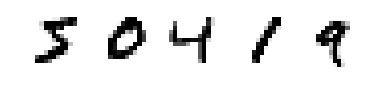

In [77]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(pooling(image[i], kernel_size, stride, padding, mode='max'), cmap=plt.cm.gray_r)
    plt.axis('off')

### Average Pooling

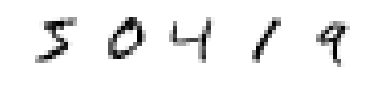

In [78]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(pooling(image[i], kernel_size, stride, padding, mode='avg'), cmap=plt.cm.gray_r)
    plt.axis('off')

### Original Image (for reference)

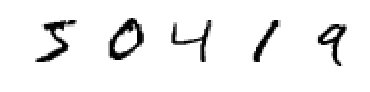

In [79]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image[i], cmap=plt.cm.gray_r)
    plt.axis('off')